In [1]:
import pandas as pd

In [2]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t' , names = ['label','message'])

In [3]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# Data Cleaning and Preprocessing

import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aakash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
ps = PorterStemmer()
corpus = []

for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]' , ' ' , messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [6]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [7]:
#creating the bag of words model

from sklearn.feature_extraction.text import CountVectorizer

#Here I have to write max_feature so that I could minimize my
#number of columns and keep it only to important columns and discarding unecessary ones
cv = CountVectorizer(max_features = 2500)

X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(messages['label'])



In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [10]:
y = y.iloc[:,1].values

In [12]:
y
#having only spam values

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 0)

In [15]:
# Training model using Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(X_train , y_train)

y_pred = spam_detect_model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

cm

array([[946,   9],
       [  7, 153]], dtype=int64)

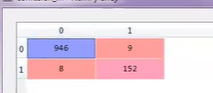

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , y_pred)

In [19]:
accuracy

0.9856502242152466